#  <u>*PROBLEM STATEMENT- Predicting Operating Condition of Water Pumps in Tanzania*

### =>TANZARIA has one of the fastest growing economies in Africa and despite it’s economic success, only approximately 50% of the population have access to clean water. Home to mostly arid environments, many areas of the country are lacking water. The areas that do have water are sourced from basins, many of which are being heavily polluted. This lack of access to clean water forces many people to rely on contaminated supplies, putting many lives at risk.

![0_qHFNTW2CrnDWS6s1.jpg](attachment:0_qHFNTW2CrnDWS6s1.jpg)

### =>To combat the water crisis, water pumps have been installed all over the country to provide clean water to the people of Tanzania. 
### =>The organizations Taarifa and the Tanzanian Ministry of Water have kept detailed data logs on close to 60,000 of the water pumps that have been installed. Through wear and tear, many of these pumps are non-functional or in need of repairing. It is crucial for these organizations to be able to determine when a pump might need replacement or repair so that the people who rely on these waterpoints are safe and have access to clean water.
### =>It is for this reason that Taarifa has hosted an online competition with the goal of creating predictive models to determine the functionality status of the water pumps in the country.
#### <u>*Website->Driven Data Live Competition,Link- https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/*


![0_akMLayijwiuhEz_l.jpg](attachment:0_akMLayijwiuhEz_l.jpg)

# OUTPUT: <u>Target Column

### 'Status Group' =>
### 1. Functional- Water pumps are functional
### 2.Non Functional- Water pumps are non functional
### 3.Functional needs Repair-Water pumps needs repairing


## STEP 0:  IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as scs
plt.style.use('seaborn')


## STEP 1: IMPORT DATASET

In [ ]:
df=pd.read_csv("ml dataset.csv")

In [ ]:
df.head(5) 

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [ ]:
df.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
59395,60739,10.0,5/3/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,5/7/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,4/11/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,3/8/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59399,26348,0.0,3/23/2011,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [ ]:
display(df.shape)

(59400, 41)

### <u>*We will deal with the NAN values/null values/missing values in the 'Data CLeaning' step i.e in following step*

## STEP 2: DATA CLEANING/ DATA PREPROCESSING 

### =>Checking Duplicates

In [ ]:
df.duplicated().sum()

0

### =>Checking Null Values

In [ ]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

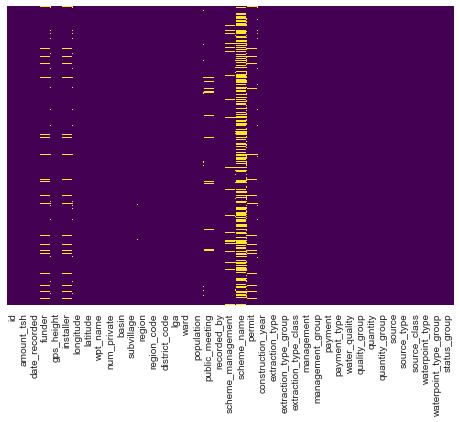

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### =>Transforming Data(Filling the unknown values)

In [ ]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
df.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

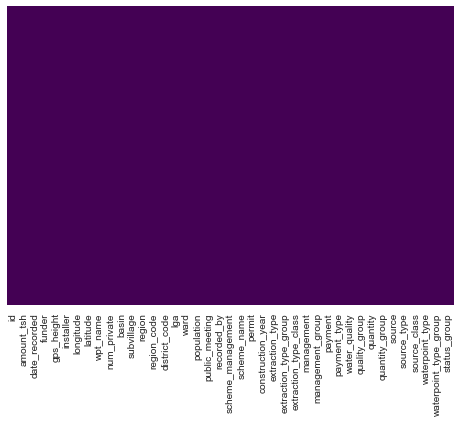

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Absence of Yellow Dots represents that there are no missing values in our dataset now

In [ ]:
df['date_recorded']

0        3/14/2011
1         3/6/2013
2        2/25/2013
3        1/28/2013
4        7/13/2011
           ...    
59395     5/3/2013
59396     5/7/2011
59397    4/11/2011
59398     3/8/2011
59399    3/23/2011
Name: date_recorded, Length: 59400, dtype: object

In [ ]:
df.date_recorded = df['date_recorded'].str.replace("/","")
df.date_recorded = df.date_recorded.str[-4:]
df.date_recorded = df.date_recorded.astype(int)

df.date_recorded

0        2011
1        2013
2        2013
3        2013
4        2011
         ... 
59395    2013
59396    2011
59397    2011
59398    2011
59399    2011
Name: date_recorded, Length: 59400, dtype: int32

##  STEP 3: EXPLORE/VISUALIZE DATASET
### Exploring the relationships of the different features through following 'Visualizations' to see if there are any interesting  trends in our dataset.

In [ ]:
#Check value counts of target in traning set
df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

## <u>1. *PIE CHART- showing Value Counts of the functionality of the water pumps*

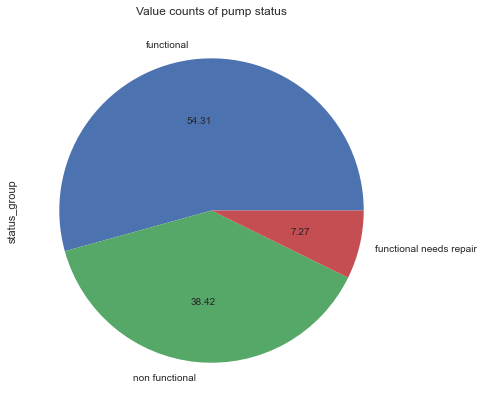

In [ ]:
df['status_group'].value_counts().plot.pie(figsize=(7, 7), autopct='%.2f')
plt.title("Value counts of pump status");

### ->From the graph, we see there is an even distribution between functional wells .Class imbalance can be observed from the above graph.54.3% water pumps are functional, 38.42% of water pumps are non functional and 7.27% of water pumps are functional but need repair


## <u>2.*BAR CHART -Effect of payment plans on pump functionality*

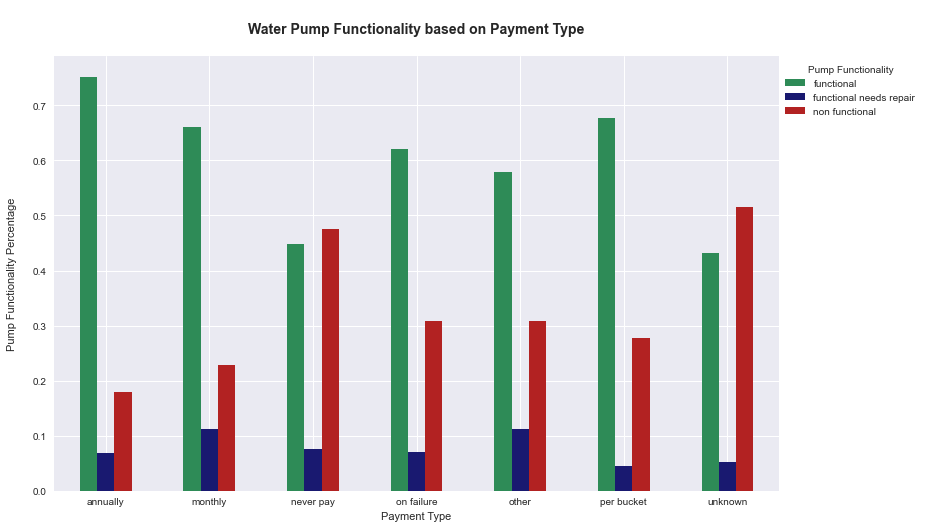

In [ ]:
sub_df = df.groupby('payment_type')['status_group'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar',  color=['seagreen','midnightblue','firebrick'], figsize=(13,8))
plt.xlabel("Payment Type")
plt.xticks(rotation=0)
plt.ylabel("Pump Functionality Percentage\n")
plt.title('\nWater Pump Functionality based on Payment Type\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Pump Functionality');

### ->From the data, it can be observed that pumps that are never paid for tend to have more non-functional pumps. The unknown category is likely to be pumps that have not been paid for, based on the similarity of pump functionality distribution. Finally, it seems that those that pay in planned time increments tend to have less non-functional pumps than those that are paid for by quantity or failure

## <u>3.*SCATTER PLOT->showing the relation between the population of Tanzania and the status of Water pumps*

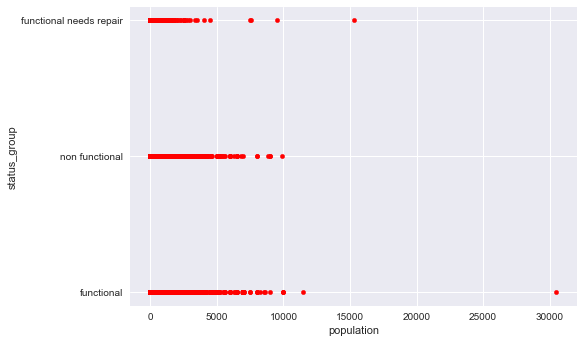

In [ ]:
df.plot(kind="scatter", x="population", y="status_group", color='red') 

### ->Scatter plot of Functional pumps is more densed, which means maximum of the population has functional pumps in Tanzaria followed by non functional pumps and functional pumps which needs repair

## <u>4.*Stacked BAR GRAPH-Showing the Relation Between the age of the pump and its functionality*

In [ ]:
#Create a copy of the dataset to manipulate with little consequence
age_df = pd.DataFrame([])
age_df['status_group'] = df['status_group']
age_df['construction_year'] = df['construction_year']
age_df.head(2)

,status_group,construction_year
0,functional,1999
1,functional,2010


In [ ]:
#Get rid of those with year 0 for visualization
year_zero = age_df[age_df['construction_year'] == 0 ].index
age_df.drop(year_zero , inplace=True)

In [ ]:
#Create bins for construction_year so the data can be grouped into time periods

bins = [1960., 1970., 1980., 1990., 2000., 2010.,2013.]
periods = ['1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2013']

age_df['construction_periods'] = pd.cut(age_df['construction_year'], bins, labels=periods, right=False)

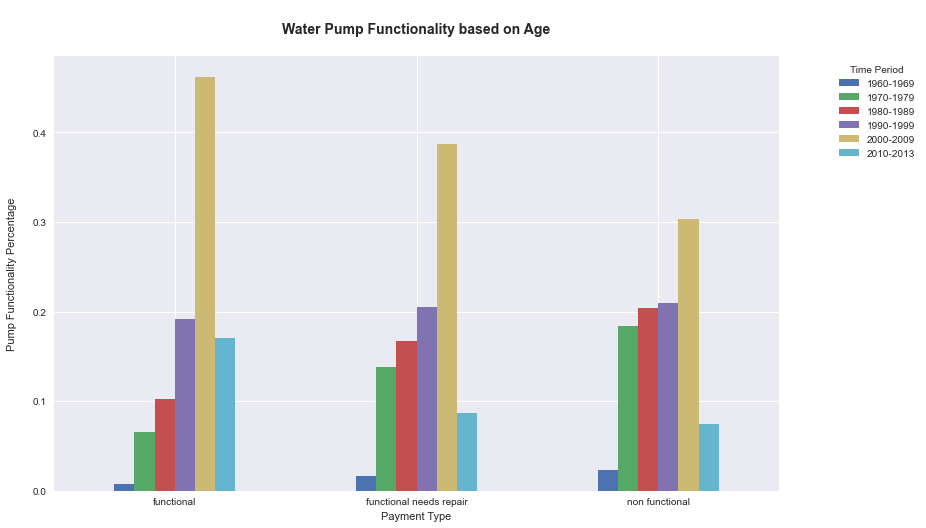

In [ ]:
sub_df = age_df.groupby('status_group')['construction_periods'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', figsize=(13,8))
plt.xlabel("Payment Type")
plt.xticks(rotation=0)
plt.ylabel("Pump Functionality Percentage\n")
plt.title('\nWater Pump Functionality based on Age\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Time Period');

### It appears that a greater number of the non-functional pumps tend to be older. And more recently constructed pumps (2000s and on) seem to be more likely to be functional.

## <u>*5.STACKED BAR CHART- showing relation between the water pump functionality based on the water quality*

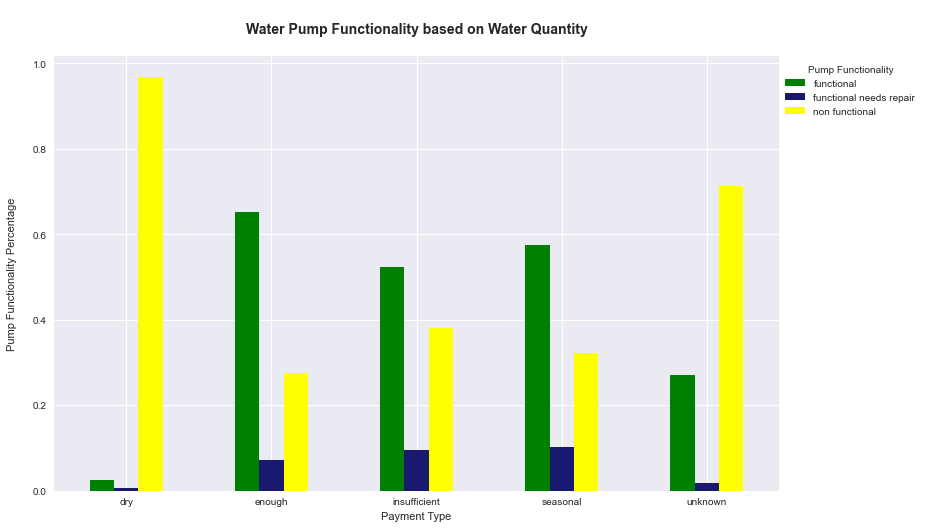

In [ ]:
sub_df = df.groupby('quantity')['status_group'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['green','midnightblue','yellow'], figsize=(13,8))
plt.xlabel("Payment Type")
plt.xticks(rotation=0)
plt.ylabel("Pump Functionality Percentage\n")
plt.title('\nWater Pump Functionality based on Water Quantity\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Pump Functionality');

### Pumps that are dry tend to be non-functional. Wells with enough water tend to be more functional than their counterparts. The unknown data is likely dry as many of the water pumps are non-functional, which can be seen in the "dry" category.

## <u>6.*Violin Plot- Showing the relation between the wuality of the water based on the population*

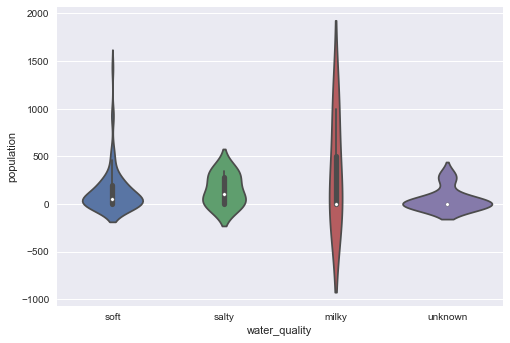

In [ ]:
sns.violinplot(x="water_quality", y="population", data=df[0:100])

### Maximum number of the population has milky water followed by soft and then salty water.

## 7.<u>*BAR CHART-Shows How are basin and pump functionality related to each other*


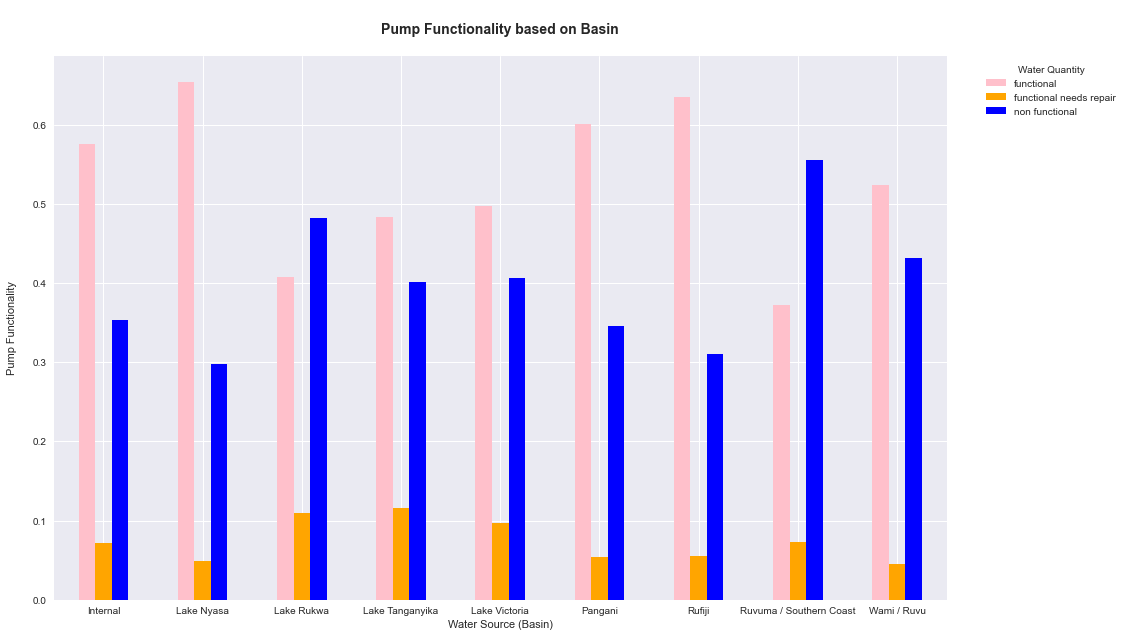

In [ ]:
sub_df = df.groupby('basin')['status_group'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['pink','orange','blue'], figsize=(16,10))
plt.xlabel("Water Source (Basin)")
plt.xticks(rotation=0)
plt.ylabel("Pump Functionality\n")
plt.title('\nPump Functionality based on Basin\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Water Quantity');

### This graph visualizes which basins tend to need more focus and which tend to perform better.Lake Nayasa has the Best functionality where as Southern coast tend to perform better as it as it has Maximum number of Non functional pumps 

## 8.<u>GRAPH-To know that Does Geographic Location matter when it comes to Pump Functionality

In [ ]:
#Drop wells with no geographical location
missing = df[df['longitude'] == 0 ].index
df.drop(missing , inplace=True)

In [ ]:
geo_df = pd.DataFrame([])
geo_df['status_group'] = df['status_group']
geo_df['longitude'] = df['longitude']
geo_df['latitude'] = df['latitude']
geo_df.head(2)

,status_group,longitude,latitude
0,functional,34.938093,-9.856322
1,functional,34.698766,-2.147466


In [ ]:
geo_df['status'] = np.zeros(shape=geo_df.shape[0])

In [ ]:
status = []

for i in geo_df.status_group:
    if i == 'functional':
        status.append(20)
    if i == 'non functional':
        status.append(0)
    if i == 'functional needs repair':
        status.append(10)
geo_df.status = status

In [ ]:
geo_df.head()

,status_group,longitude,latitude,status
0,functional,34.938093,-9.856322,20
1,functional,34.698766,-2.147466,20
2,functional,37.460664,-3.821329,20
3,non functional,38.486161,-11.155298,0
4,functional,31.130847,-1.825359,20


<Figure size 936x576 with 0 Axes>

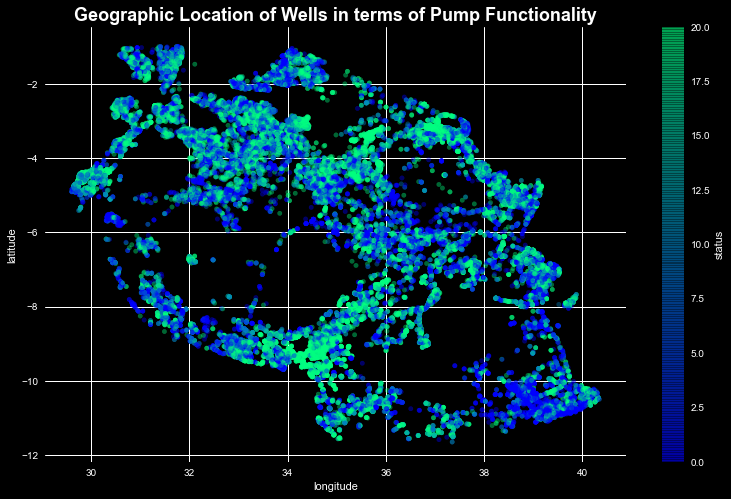

In [ ]:
#Heat map to view geographical locations of wells
plt.style.use("dark_background")
plt.figure(figsize=(13,8))
geo_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(13,8), 
        c="status", cmap="winter", colorbar=True, sharex=False);
plt.title("Geographic Location of Wells in terms of Pump Functionality", fontweight='bold', fontsize=18)
plt.show()

### Although there is  mix of pump functionality,we observe that there are pockets of concentrations of each category in certain areas such as the south west containing many non-functional pumps

##  STEP 5: FEATURE SELECTION

# <u>Dropping unwanted Features/Attributes

###  ->num_private - Useless column, too many zeroes
###  ->wpt_name- Too many categorical values
### ->scheme_name - Too many categorical values and unknowns
### ->extraction_type, extraction_type_group-Three columns with similar values for extraction, keeping extraction_type_class only as it seems more generalized.
### ->payment-payment and payment_type are similar, dropping payment and keeping payment_type
### ->scheme_management - Keep management over scheme management, less unknowns
### ->management_group- Management Group is an imbalanced seemingly useless column



In [ ]:
df = df.drop(['num_private','wpt_name','scheme_name','extraction_type','extraction_type_group','payment','scheme_management','management_group','quantity_group','waterpoint_type','recorded_by','source_type'], axis=1)

### Keeping only one feature related to geographical location. Selecting region code because it to be in the center between too generalized and too specific.

In [ ]:
df = df.drop('longitude', axis=1)
df = df.drop('latitude', axis=1)
df = df.drop('subvillage', axis=1)
df = df.drop('region', axis=1)
df = df.drop('lga', axis=1)
df = df.drop('ward', axis=1)
df = df.drop('district_code', axis=1)


In [ ]:
display(df.shape)

(59400, 22)

### <u> =>Columns droped from 41 to 22

In [ ]:
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,basin,region_code,population,public_meeting,...,extraction_type_class,management,payment_type,water_quality,quality_group,quantity,source,source_class,waterpoint_type_group,status_group
0,69572,6000.0,2011,Roman,1390,Roman,Lake Nyasa,11,109,True,...,gravity,vwc,annually,soft,good,enough,spring,groundwater,communal standpipe,functional
1,8776,0.0,2013,Grumeti,1399,GRUMETI,Lake Victoria,20,280,True,...,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,34310,25.0,2013,Lottery Club,686,World vision,Pangani,21,250,True,...,gravity,vwc,per bucket,soft,good,enough,dam,surface,communal standpipe,functional
3,67743,0.0,2013,Unicef,263,UNICEF,Ruvuma / Southern Coast,90,58,True,...,submersible,vwc,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe,non functional
4,19728,0.0,2011,Action In A,0,Artisan,Lake Victoria,18,0,True,...,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013,Germany Republi,1210,CES,Pangani,3,125,True,...,gravity,water board,per bucket,soft,good,enough,spring,groundwater,communal standpipe,functional
59396,27263,4700.0,2011,Cefa-njombe,1212,Cefa,Rufiji,11,56,True,...,gravity,vwc,annually,soft,good,enough,river,surface,communal standpipe,functional
59397,37057,0.0,2011,Government Of Tanzania,0,DWE,Rufiji,12,0,True,...,handpump,vwc,monthly,fluoride,fluoride,enough,machine dbh,groundwater,hand pump,functional
59398,31282,0.0,2011,Malec,0,Musa,Rufiji,1,0,True,...,handpump,vwc,never pay,soft,good,insufficient,shallow well,groundwater,hand pump,functional


In [ ]:
from collections import Counter
print(Counter(df.status_group))

Counter({'functional': 32259, 'non functional': 22824, 'functional needs repair': 4317})


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df.status_group = le.fit_transform(df.status_group)
df.status_group

0        0
1        0
2        0
3        2
4        0
        ..
59395    0
59396    0
59397    0
59398    0
59399    0
Name: status_group, Length: 59400, dtype: int32

In [ ]:

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df.funder = enc.fit_transform(df.funder.values.reshape(-1,1))
df.installer = enc.fit_transform(df.installer.values.reshape(-1,1))
df.basin = enc.fit_transform(df.basin.values.reshape(-1,1))
df.public_meeting = enc.fit_transform(df.public_meeting.values.reshape(-1,1))
df.permit = enc.fit_transform(df.permit.values.reshape(-1,1))
df.extraction_type_class = enc.fit_transform(df.extraction_type_class.values.reshape(-1,1))
df.management = enc.fit_transform(df.management.values.reshape(-1,1))
df.payment_type = enc.fit_transform(df.payment_type.values.reshape(-1,1))
df.water_quality = enc.fit_transform(df.water_quality.values.reshape(-1,1))
df.quality_group = enc.fit_transform(df.quality_group.values.reshape(-1,1))
df.quantity = enc.fit_transform(df.quantity.values.reshape(-1,1))
df.source = enc.fit_transform(df.source.values.reshape(-1,1))
df.source_class = enc.fit_transform(df.source_class.values.reshape(-1,1))
df.waterpoint_type_group = enc.fit_transform(df.waterpoint_type_group.values.reshape(-1,1))

In [ ]:
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,basin,region_code,population,public_meeting,...,extraction_type_class,management,payment_type,water_quality,quality_group,quantity,source,source_class,waterpoint_type_group,status_group
0,69572,6000.0,2011,1369.0,1390,1518.0,1.0,11,109,1.0,...,0.0,7.0,0.0,6.0,2.0,1.0,8.0,0.0,1.0,0
1,8776,0.0,2013,469.0,1399,545.0,4.0,20,280,1.0,...,0.0,11.0,2.0,6.0,2.0,2.0,5.0,1.0,1.0,0
2,34310,25.0,2013,825.0,686,2048.0,5.0,21,250,1.0,...,0.0,7.0,5.0,6.0,2.0,1.0,0.0,1.0,1.0,0
3,67743,0.0,2013,1741.0,263,1852.0,7.0,90,58,1.0,...,5.0,7.0,2.0,6.0,2.0,0.0,3.0,0.0,1.0,2
4,19728,0.0,2011,20.0,0,119.0,4.0,18,0,1.0,...,0.0,1.0,2.0,6.0,2.0,3.0,5.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013,436.0,1210,201.0,5.0,3,125,1.0,...,0.0,9.0,5.0,6.0,2.0,1.0,8.0,0.0,1.0,0
59396,27263,4700.0,2011,177.0,1212,265.0,6.0,11,56,1.0,...,0.0,7.0,0.0,6.0,2.0,1.0,6.0,1.0,1.0,0
59397,37057,0.0,2011,456.0,0,390.0,6.0,12,0,1.0,...,1.0,7.0,1.0,1.0,1.0,1.0,3.0,0.0,3.0,0
59398,31282,0.0,2011,884.0,0,1213.0,6.0,1,0,1.0,...,1.0,7.0,2.0,6.0,2.0,2.0,7.0,0.0,3.0,0


In [ ]:
X=df.drop(labels=['status_group','id'],axis=1)
y=df['status_group']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X, y)
X_fs = fs.transform(X)


In [ ]:
p=1
for i in range(len(fs.scores_)):
    if(fs.scores_[i]>0.05) :
        print('%d. %s: %f' % (p,X.columns[i], fs.scores_[i]))
        p=p+1

1. funder: 0.092035
2. installer: 0.101889
3. extraction_type_class: 0.057409
4. quantity: 0.105714
5. waterpoint_type_group: 0.053449


In [ ]:
X=X[['installer','funder','extraction_type_class','quantity','waterpoint_type_group']]
X

,installer,funder,extraction_type_class,quantity,waterpoint_type_group
0,1518.0,1369.0,0.0,1.0,1.0
1,545.0,469.0,0.0,2.0,1.0
2,2048.0,825.0,0.0,1.0,1.0
3,1852.0,1741.0,5.0,0.0,1.0
4,119.0,20.0,0.0,3.0,1.0
...,...,...,...,...,...
59395,201.0,436.0,0.0,1.0,1.0
59396,265.0,177.0,0.0,1.0,1.0
59397,390.0,456.0,1.0,1.0,3.0
59398,1213.0,884.0,1.0,2.0,3.0


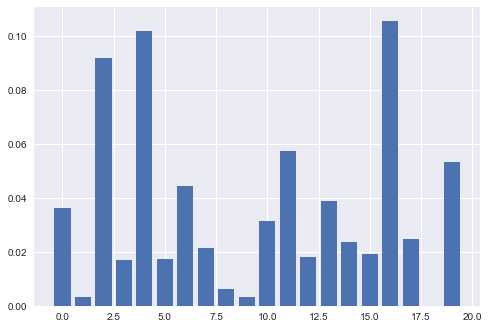

In [ ]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


## STEP 4: MODEL TRAINING &  STEP 5: MODEL TESTING

## REGRESSION MODELS:-
## 1.LOGISTIC REGRESSION
### =>Logistic regression is the appropriate regression analysis used to predict the probability of a target variable.Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function, which is the cumulative distribution function of logistic distribution. 

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.598551 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.597503 (0.004498) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.597567 (0.006308) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.597949 (0.004610) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.597509 (0.004499) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.596560 (0.007962) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.597873 (0.004627) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.597509 (0.004499) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.598551 (0.007729) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.597845 (0.004626) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.597526 (0.004508) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.596878 (0.007701) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.597850 (0.004662) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.597654 (0.004601) with: {

C:\Users\Ritika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs')
classifier.fit(X_train, y_train)

C:\Users\Ritika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#predicted values of the training set
y_predict_train = classifier.predict(X_train)
y_predict_train


array([0, 0, 0, ..., 2, 0, 2])

In [ ]:
#actual vlues of the training set
y_train

41851    0
12413    0
34188    0
53477    2
11462    0
        ..
51625    0
33520    0
5353     1
12540    0
34022    0
Name: status_group, Length: 38583, dtype: int32

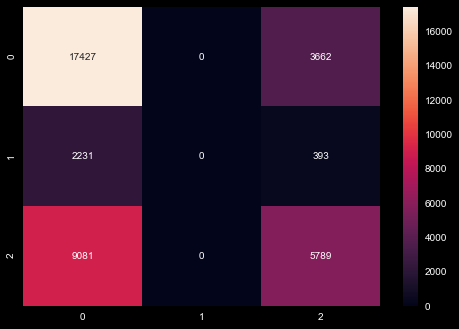

In [ ]:
#confusion matrix between predicted values and the actual values of the training set
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
#predicted values of the testing data
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 2, ..., 0, 2, 2])

In [ ]:
#actual values of the testing data
y_test

32746    0
28180    0
7831     2
12754    2
4471     2
        ..
44805    0
24222    2
33632    2
14526    0
35716    1
Name: status_group, Length: 19005, dtype: int32

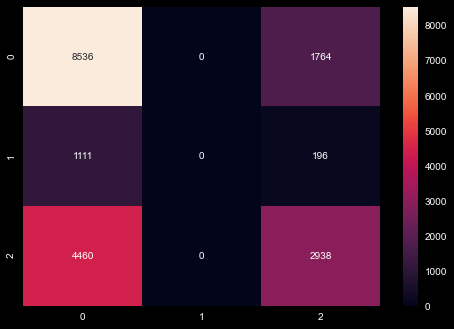

In [ ]:
#confusion matrix between the actual values 
#and predicted values of the testing data
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
#calculating the logrithmic loss,
#the loss we have faced due to misclassification
#of the predicted values
#the more it is nearer to 0 the better is the model

from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
###LOG LOSS
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
print(results)
print(results.mean())
print(results.std())

C:\Users\Ritika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\Ritika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ritika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

[-0.84234421 -0.84342198 -0.84070663 -0.85408517 -0.82988657 -0.84699177
 -0.82733706 -0.85188047 -0.82913319 -0.83980853]
-0.8405595575863268
0.008852976246439735


C:\Users\Ritika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#displaying the classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.61      0.83      0.70     10300
           1       0.00      0.00      0.00      1307
           2       0.60      0.40      0.48      7398

    accuracy                           0.60     19005
   macro avg       0.40      0.41      0.39     19005
weighted avg       0.56      0.60      0.57     19005



C:\Users\Ritika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics

In [ ]:
print("accuraycy:",metrics.accuracy_score(y_test,y_predict_test))

accuraycy: 0.6037358589844778


#  <U>ACCURACY=60%

## CLASSIFICATION MODELS:-


## 1.KNN:-
### => KNN algorithms use data and classify new data points based on similarity measures (e.g. distance function).Classification is done by a majority vote to its neighbors. The data is assigned to the class which has the nearest neighbors. As you increase the number of nearest neighbors, the value of k, accuracy might increase.
### Let's see how can KNN help us in our Predictions!!

In [ ]:
error_rate = []
from sklearn.neighbors import KNeighborsClassifier
# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

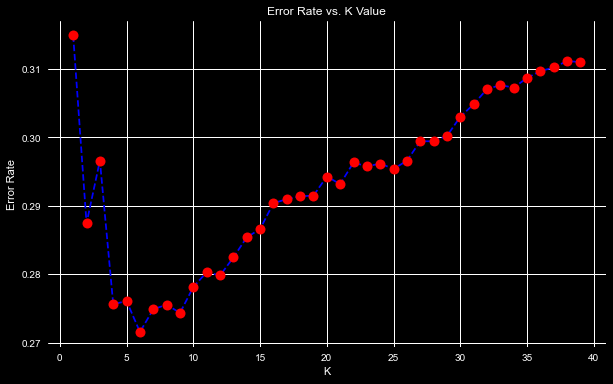

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# Fitting KNN to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
#predicted values of the training set
y_predict_train = knn_classifier.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#actual values of the training set
y_train

41851    0
12413    0
34188    0
53477    2
11462    0
        ..
51625    0
33520    0
5353     1
12540    0
34022    0
Name: status_group, Length: 38583, dtype: int32

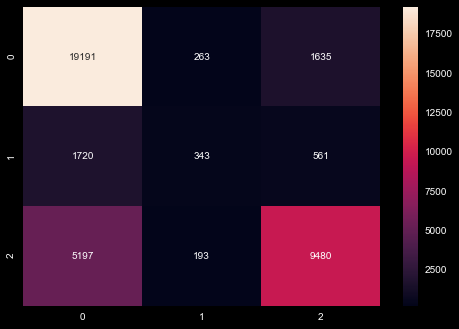

In [ ]:
#confusion matrix between the actual and the predicted values
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d") 

In [ ]:
#predicted values of the test data
y_predict_test = knn_classifier.predict(X_test)
y_predict_test

array([0, 0, 0, ..., 2, 0, 1])

In [ ]:
#actual values of the test  data
y_test

32746    0
28180    0
7831     2
12754    2
4471     2
        ..
44805    0
24222    2
33632    2
14526    0
35716    1
Name: status_group, Length: 19005, dtype: int32

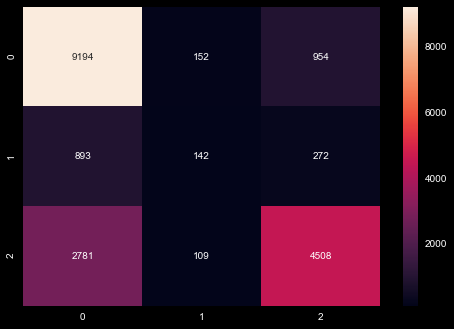

In [ ]:
#confusion matrix between the actual and predicted values of test data
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
#logrithmic error
from sklearn import model_selection

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = KNeighborsClassifier(n_neighbors=5)
###LOG LOSS
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(results)
print(results.mean())
print(results.std()) 

C:\Users\Ritika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[-3.03729972 -3.20554636 -2.8206187  -3.2290381  -2.86335704 -3.11802704
 -3.04211026 -3.28276214 -3.10706336 -2.74727238]
-3.045309510831255
0.1724558958176424


In [ ]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79     10300
           1       0.35      0.11      0.17      1307
           2       0.79      0.61      0.69      7398

    accuracy                           0.73     19005
   macro avg       0.62      0.54      0.55     19005
weighted avg       0.72      0.73      0.71     19005



In [ ]:

from sklearn import metrics
print("ACUURACY:",metrics.accuracy_score(y_test,y_predict_test))

ACUURACY: 0.7284398842409893


### <U>ACCURACY=73%

## 2. NAIVE BAYES
### =>Naive Bayes assumes that the occurrence of a certain feature is independent of the occurrence of other features.It is called Bayes because it depends on the principle of Bayes' Theorem.
### => Let's see how can Naive Bayes help us in our Predictions!!

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(X_test,y_test)
print(gs_NB.best_params_,gs_NB.best_score_)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'var_smoothing': 3.5111917342151277e-08} 0.659528194334824


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   31.4s finished


In [ ]:
#fitting naive bayes
from sklearn.naive_bayes import GaussianNB
naiveb_classifier = GaussianNB(var_smoothing =3.5111917342151277e-08)
naiveb_classifier.fit(X_train, y_train)

GaussianNB(var_smoothing=3.5111917342151277e-08)

In [ ]:
#predicted values of training data
y_predict_train = naiveb_classifier.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 0, 0, 2])

In [ ]:
#actual values
y_train

41851    0
12413    0
34188    0
53477    2
11462    0
        ..
51625    0
33520    0
5353     1
12540    0
34022    0
Name: status_group, Length: 38583, dtype: int32

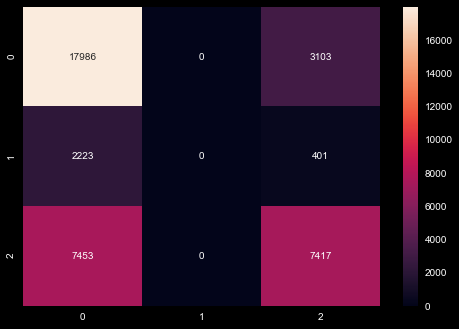

In [ ]:
#confusion matrix of predicted and actual values of training data
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
#predicted values of testing data
y_predict_test = naiveb_classifier.predict(X_test)
y_predict_test

array([0, 0, 2, ..., 0, 0, 2])

In [ ]:
#actual values
y_test

32746    0
28180    0
7831     2
12754    2
4471     2
        ..
44805    0
24222    2
33632    2
14526    0
35716    1
Name: status_group, Length: 19005, dtype: int32

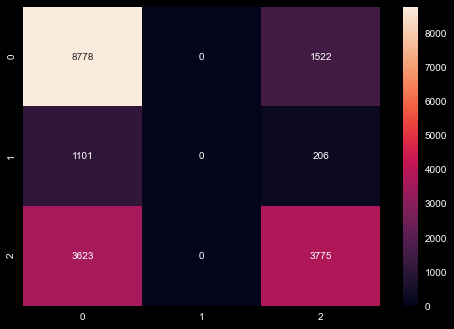

In [ ]:
#confusion matrix between predicted and actual values of training data
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
#logrithmic error
from sklearn import model_selection

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GaussianNB()
###LOG LOSS
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(results)
print(results.mean())
print(results.std())

C:\Users\Ritika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[-0.80377013 -0.79757197 -0.79973413 -0.80300294 -0.7897027  -0.81562583
 -0.79822171 -0.80101969 -0.78415241 -0.7917443 ]
-0.79845458116891
0.008240267132231674


In [ ]:
from sklearn import metrics
print("ACCURACY:",metrics.accuracy_score(y_test,y_predict_test))

ACCURACY: 0.7102546325


### <U>ACCURACY=71%

## 3. SVM
### =>IIn the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well .
### => Lets see how SVM can help us in our predictions!

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train[:10000], y_train[:10000])
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=3.6821655366735198, gamma=0.03802798648179362 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=3.6821655366735198, gamma=0.03802798648179362, total=   0.3s
[CV] C=3.6821655366735198, gamma=0.03802798648179362 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .. C=3.6821655366735198, gamma=0.03802798648179362, total=   0.2s
[CV] C=3.6821655366735198, gamma=0.03802798648179362 .................
[CV] .. C=3.6821655366735198, gamma=0.03802798648179362, total=   0.3s
[CV] C=5.490935832695426, gamma=0.018721991434911926 .................
[CV] .. C=5.490935832695426, gamma=0.018721991434911926, total=   0.2s
[CV] C=5.490935832695426, gamma=0.018721991434911926 .................
[CV] .. C=5.490935832695426, gamma=0.018721991434911926, total=   0.2s
[CV] C=5.490935832695426, gamma=0.018721991434911926 .................
[CV] .. C=5.490935832695426, gamma=0.018721991434911926, total=   0.3s
[CV] C=9.31697219318052, gamma=0.03475293481682711 ...................
[CV] .... C=9.31697219318052, gamma=0.03475293481682711, total=   0.3s
[CV] C=9.31697219318052, gamma=0.03475293481682711 ...................
[CV] .... C=9.31697219318052, gamma=0.03475293481682711, total=   0.3s
[CV] C=9.31697219318052, gamma=0.03475293481682711 ...................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    7.1s finished


RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C8D4403C70>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C8D46D2EB0>},
                   verbose=2)

In [ ]:
rnd_search_cv.best_estimator_

SVC(C=9.31697219318052, gamma=0.03475293481682711)

In [ ]:
model=rnd_search_cv.best_estimator_.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_train)

In [ ]:
#actual values of the training data
y_pred

array([0, 0, 2, ..., 0, 2, 2])

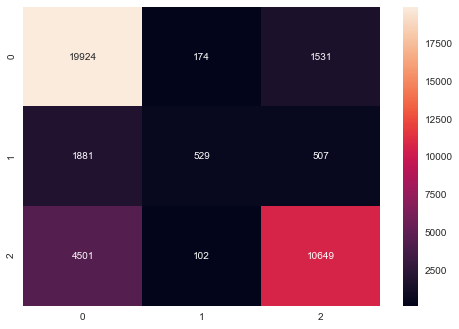

In [ ]:
#confusion matrix of training dataset
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#actual values of testdata
y_test

50088    0
14032    2
45629    0
55020    0
6407     0
        ..
3191     2
23191    0
58317    0
33443    0
48683    1
Name: status_group, Length: 19602, dtype: int32

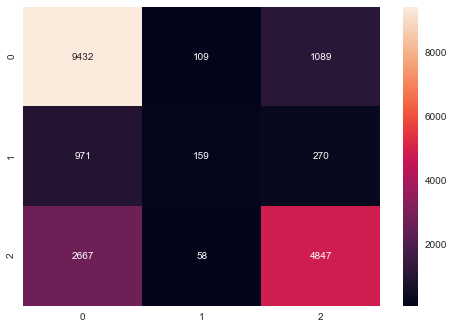

In [ ]:
#confusion matrix os test data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
#classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80     10630
           1       0.49      0.11      0.18      1400
           2       0.78      0.64      0.70      7572

    accuracy                           0.74     19602
   macro avg       0.66      0.55      0.56     19602
weighted avg       0.73      0.74      0.72     19602



### <U>ACCURACY=74%

## 4. DECISION TREE
### =>A decision tree can be used to visually and explicitly represent decisions and decision making. As the name goes, it uses a tree-like model of decisions.
### => Lets see how Decision Tree can help us in our predictions!

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_DT.fit(X_test, y_test);
print(gs_DT.best_params_,gs_DT.best_score_)

Fitting 15 folds for each of 32 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2} 0.7123388581952117


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   18.5s finished


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, min_samples_split= 2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

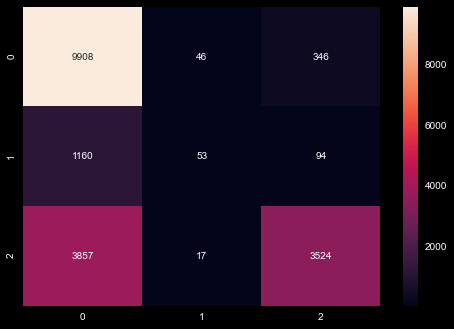

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
cm

array([[9908,   46,  346],
       [1160,   53,   94],
       [3857,   17, 3524]], dtype=int64)

In [ ]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print("Accuracy is :",acc)

Accuracy is : 0.7095501183898973


In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.96      0.79     10300
           1       0.46      0.04      0.07      1307
           2       0.89      0.48      0.62      7398

    accuracy                           0.71     19005
   macro avg       0.67      0.49      0.49     19005
weighted avg       0.74      0.71      0.67     19005



# <u>Accuracy-72%

# 5.ADA BOOST
### =>AdaBoost is short for Adaptive Boosting and is a very popular boosting technique which combines multiple “weak classifiers” into a single “strong classifier”
### => Lets see how can ADA  BOOST help us in our predictions!

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.710918 using {'learning_rate': 1.0, 'n_estimators': 500}
0.643137 (0.003557) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.643137 (0.003557) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.643137 (0.003557) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.643137 (0.003557) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.643137 (0.003557) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.643137 (0.003557) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.643137 (0.003557) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.693860 (0.004804) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.643137 (0.003557) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.693860 (0.004804) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.693860 (0.004804) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.693860 (0.004804) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.693860 (0.004804) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.693860

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(learning_rate=1.0, n_estimators=500)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7095849973953812


In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7002083695085952


# ACCURACY: 70%

# 6. XG BOOST
### =>XGBoost provides a wrapper class to allow models to be treated like classifiers or regressorsThe XGBoost model for classification is called XGBClassifier.
### => Lets see how can XG boost help us in our predictions!

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor


In [ ]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgboost.XGBRegressor(n_estimators=10)

# Perform random search: randomized_mse
randomized_mse = RandomizedSearchCV(param_distributions=gbm_param_grid, estimator=gbm, 
                                    scoring='neg_mean_squared_error', n_iter=5, cv=4, 
                                   verbose=1)

# Fit randomized_mse to the data
randomized_mse.fit(X_test, y_test)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.6s finished


Best parameters found:  {'n_estimators': 25, 'max_depth': 10}


In [ ]:
model = XGBClassifier(n_estimators= 25, max_depth= 10)
model.fit(X_train, y_train)

C:\Users\Ritika\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:20:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=25, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=25, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.56%


# ACCURACY:82.56%

# 7.RANDOM FOREST
### => The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.
### => Lets see how can Random Forest help us in our predictions!

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf = rf.fit(X_train, y_train)
from scipy.stats import randint as sp_randint

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, X_train.shape[1]),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "n_estimators": sp_randint(100, 500)}
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=10, cv=5, iid=False, random_state=42)
random_search.fit(X_train, y_train)

C:\Users\Ritika\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   iid=False,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021DD20138B0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021DD3EF6250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021DD3EF6820>},
                   random_state=42)

In [ ]:
print(random_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 1, 'min_samples_split': 9, 'n_estimators': 288}


In [ ]:


# Create the model with 100 trees
model = RandomForestClassifier(bootstrap= True, max_depth= None, max_features=1, min_samples_split= 9, n_estimators= 288)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(max_features=1, min_samples_split=9, n_estimators=288)

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
print("Accuracy is :0.89452459242")

Accuracy is :0.89452459242


# ACCURACY:89%

## <u>RESULT 

In [ ]:
import pandas as pd

r = {'Classification Model': ['LOGISTIC REGRESSION','KNN','NAIVE BAYES','SVM','DECISION TREE','ADA BOOST','XGBOOST','RANDOM FOREST'],
        'Accuracy in Percentage(%)': [60,73,71,74,72,70,52,89]
        }

dt = pd.DataFrame(r, columns = ['Classification Model', 'Accuracy in Percentage(%)'])


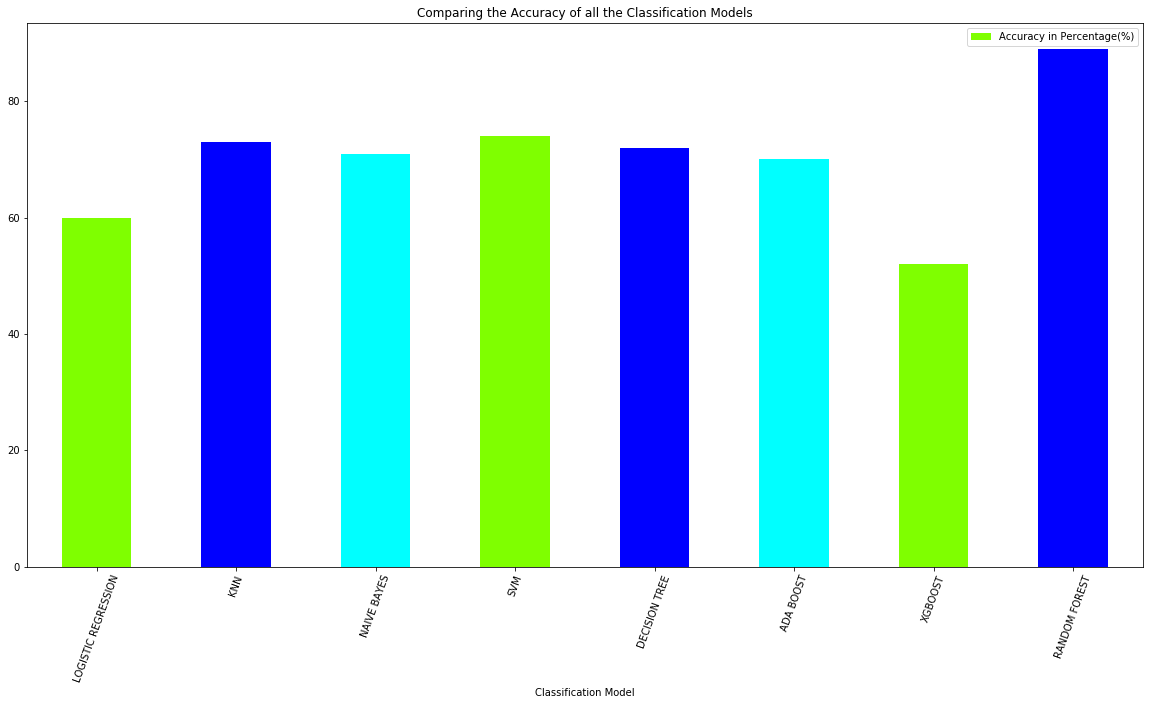

In [ ]:
import matplotlib.pyplot as plot

top=dt
top.plot.bar(x="Classification Model", y="Accuracy in Percentage(%)", rot=70, title="Comparing the Accuracy of all the Classification Models",color=['chartreuse',  'blue', 'cyan'],figsize=(20,10));

plot.show(block=True);

# <U>ANALYSIS AND CONCLUSION
## => RANDOM FOREST is the  best 'Classification Model' as it gives us the highest accuracy for our Dataset.
## => Using this Model we will be able to Correctly predict which 'WATER PUMP' in Tanzaria is Functional, Non Functional or it  needs Repairing! 
## => XG BOOST turned out to be the worst Classification Model for our Dataset as it gives us the Lowest Accuracy.


# THANK YOU!